# Figures for "The ultimate causes of division of labour"


## Figure 3

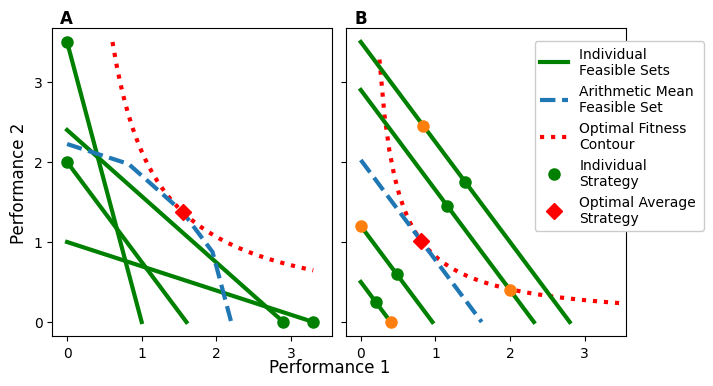

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import random
from scipy.stats import lognorm
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def average_feasible_set_analytic(xs,ys,ax,show=True):

    # reorder lines shallowest to steepest
    perm = np.argsort(-xs/ys)
    xs = xs[perm]
    ys = ys[perm]

    X = 0
    Y = sum(ys)

    Xs = np.array([X])
    Ys = np.array([Y])

    for i in range(len(xs)):
        X += xs[i]
        Y -= ys[i]
        Xs = np.append(Xs,X)
        Ys = np.append(Ys,Y)

    Xs = Xs/len(xs)
    Ys = Ys/len(ys)

    if show:
        ax.plot(Xs, Ys,
                '--',
                c='#1f77b4',
                markersize=4,
                label="Arithmetic Mean \nFeasible Set")

    return Xs, Ys

def average_feasible_set_brute(xs,ys):

    Xs = np.full(2**len(xs),np.nan)
    Ys = np.full(2**len(ys),np.nan)

    cm = np.full(2**len(xs),np.nan)

    for i, c in enumerate(it.product([0, 1], repeat=len(xs))):
        c = np.array(c)
        if i==2:
            print(c,xs,xs@c)
        Xs[i] = xs@c/len(xs)
        Ys[i] = ys@(1-c)/len(ys)
        # cm[i] = (sum(c)-len(c)/2)**2 # colour based on how specialised

    sc = plt.scatter(Xs, Ys, marker='x') #, c=cm)

    return Xs, Ys, cm

fig, ax = plt.subplots(1,2, figsize=(7.4,4),sharey=True)
fig.subplots_adjust(wspace=0.05)
fig.supxlabel('Performance 1', fontsize=12)
plt.rcParams['lines.linewidth'] = 3

#### Different Opportunity Costs

xs =  np.array([1,1.6,2.9,3.3])
ys =  np.array([3.5,2,2.4,1])

ax[0].plot(np.vstack((np.zeros(len(xs)), xs)),
           np.vstack((ys, np.zeros(len(ys)))),
           'g-')

optx, opty = (2.9+3.3)/4, (3.5+2)/4
optw = optx*opty
A = np.linspace(optw/max(ys),max(xs))
ax[0].plot(A,optw/A,'r:',zorder=-1)

average_feasible_set_analytic(xs,ys,ax[0])

ax[0].plot(optx, opty,'rD', markersize=8 )
ax[0].plot(0,2,'go', markersize=8)
ax[0].plot(0,3.5,'go', markersize=8)
ax[0].plot(2.9,0,'go', markersize=8)
ax[0].plot(3.3, 0 ,'go', markersize=8)

ax[0].set_xlim([-.2,max(xs)+.25])
ax[0].set_xticks(range(4))

ax[1].set_xlim([-.2,max(xs)+.25])
ax[1].set_xticks(range(4))

ax[0].set_yticks(range(4))
ax[0].set_ylabel('Performance 2', fontsize=12)

# average_feasible_set_brute(xs,ys)

#### Equal Opportunity Costs

ys =  np.array([3.5,2.9,1.2,.5])
xs = ys*.8

ax[1].plot(np.vstack((np.zeros(len(xs)), xs)),
           np.vstack((ys, np.zeros(len(ys)))),
           'g-')
ax[1].plot([], [], 'g-', label="Individual \nFeasible Sets")

average_feasible_set_analytic(xs,ys,ax[1])

optx, opty = sum(xs)/8, sum(ys)/8

optw = optx*opty
A = np.linspace(.25,max(xs)/.8)
ax[1].plot(A,optw/A,'r:', label='Optimal Fitness \nContour',zorder=-1)

ax[1].plot(xs/2,ys/2,'go', markersize=8,label='Individual\nStrategy')

ax[1].plot(optx, opty,'rD', markersize=8 ,label='Optimal Average\nStrategy')

ax[1].legend(fontsize=10,bbox_to_anchor=(.65,.98), framealpha=1)

ax[1].plot(.4,0,'o',color='tab:orange', markersize=8)
ax[1].plot(0,1.2,'o',color='tab:orange', markersize=8)
ax[1].plot(2,.4,'o',color='tab:orange', markersize=8)
ax[1].plot(.84,2.45,'o',color='tab:orange', markersize=8)

plt.text(-3.95, 3.8, 'A', fontsize=12, fontweight='bold', ha='center', va='center')
plt.text(0, 3.8, 'B', fontsize=12, fontweight='bold', ha='center', va='center')

plt.savefig('linear_2D.pdf', bbox_inches="tight")
plt.savefig('linear_2D.svg', bbox_inches="tight")

# Figure 4

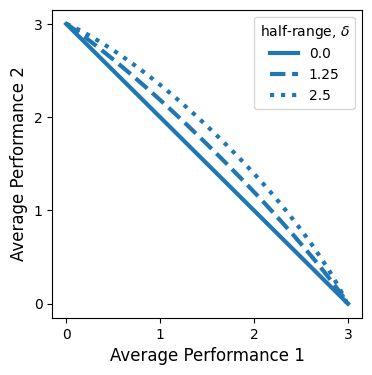

In [7]:
fig, ax = plt.subplots(1,1,figsize=(4,4))

ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1, 2, 3])

ax.set_xlabel('Average Performance 1', fontsize=12)
ax.set_ylabel('Average Performance 2', fontsize=12)

for i, r in enumerate(np.linspace(0,2.5,3)):

    size = 10000

    xs = np.random.uniform(3-r/2,3+r/2,size)
    ys = np.random.uniform(3-r/2,3+r/2,size)

    # ax[1].hist(xs,bins=30,density=True,label=var)

    Xs, Ys = average_feasible_set_analytic(xs,ys,ax,show=False)

    ax.plot(Xs, Ys, color='#1f77b4', linestyle=['-', '--', ':'][i], label=f'{r}')

ax.legend(title=r'half-range, $\delta$',title_fontsize=10)

plt.savefig('linear_feasible_set_variance.pdf', bbox_inches="tight")
plt.savefig('linear_feasible_set_variance.svg', bbox_inches="tight")

## Figure S3

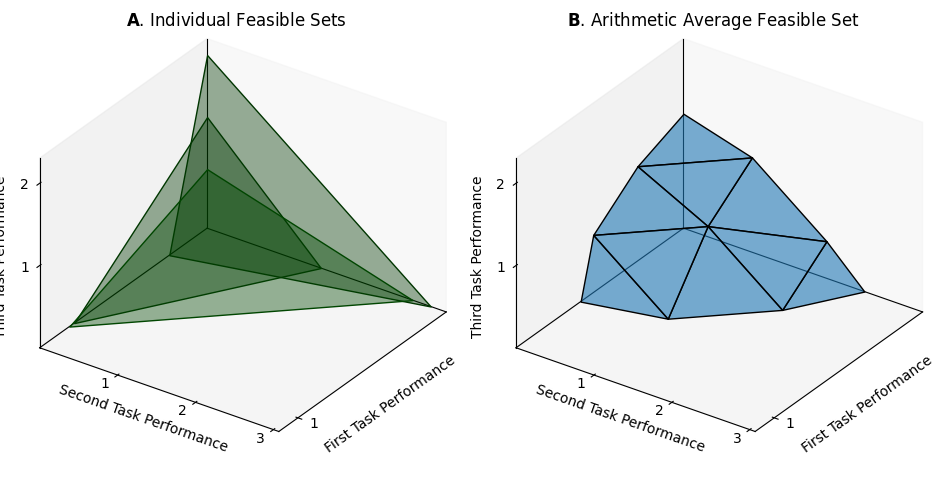

In [16]:
np.random.seed(33)

#### Feasible Sets

feasible_sets = [np.diag(np.random.uniform(0.2, 3, 3)) for _ in range(n)]

x_max = np.max([x for (x, _, _) in feasible_sets])+0.2
y_max = np.max([y for (_, y, _) in feasible_sets])+0.2
z_max = np.max([z for (_, _, z) in feasible_sets])+0.2

#### Figure

fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.05)

ax0 = fig.add_subplot(121,projection='3d')
ax1 = fig.add_subplot(122,projection='3d')

ax0.set_title(r'$\bf{A}$. Individual Feasible Sets',y=1.04)
ax1.set_title(f'Mean Feasible Set (p={p})',y=1.04)
ax1.set_title(r'$\bf{B}$. Arithmetic Average Feasible Set',y=1.04)

for ax in [ax0, ax1]:

    ax.view_init(elev=30, azim=35)
    ax.grid(False)
    ax.set_proj_type('ortho')

    ax.plot([0, x_max], [0, 0], [0, 0], "k", linewidth=.8)
    ax.plot([0, 0], [0, y_max], [0, 0], "k", linewidth=.8)
    ax.plot([0, 0], [0, 0], [0, z_max], "k", linewidth=.8)

    ax.set_xlim(0, x_max)
    ax.set_ylim(0, y_max)
    ax.set_zlim(0, z_max)

    ax.set_xlabel('First Task Performance',labelpad=-1)
    ax.set_ylabel('Second Task Performance',labelpad=-5)
    ax.set_zlabel('Third Task Performance',labelpad=-5)

    ax.set_xticks(range(1,int(x_max)+1))
    ax.set_yticks(range(1,int(y_max)+1))
    ax.set_zticks(range(1,int(z_max)+1))

    ax.tick_params(axis='x', pad=.2)
    ax.tick_params(axis='y', pad=.6)
    ax.tick_params(axis='z', pad=.2)

    for tick in ax.get_xticklabels():
        tick.set_verticalalignment('bottom')
        tick.set_horizontalalignment('left')

    for tick in ax.get_yticklabels():
        tick.set_verticalalignment('bottom')
        tick.set_horizontalalignment('right')

    for tick in ax.get_zticklabels():
        tick.set_verticalalignment('center')
        tick.set_horizontalalignment('left')

#### Individual

for (x,y,z) in feasible_sets:
    ax0.plot_trisurf(x,y,z, alpha=0.4, color='g', edgecolors='g')
    # ax0.plot(x,y,z,'go',markersize=3)

#### Average

average_feasible_set = []
for points in it.product(*feasible_sets):
    points = np.vstack(points)

    average = (np.sum(points**p, axis=0)/n)**(1/p)

    average_feasible_set.append(average)

average_feasible_set.append(np.zeros(3))

average_feasible_set = np.array(average_feasible_set)

# ax1.scatter(average_feasible_set[:, 0],
#             average_feasible_set[:, 1],
#             average_feasible_set[:, 2],
#             color='blue', s=5, alpha=0.8)

average_feasible_set_boundary = ConvexHull(average_feasible_set)

hull_vertices = average_feasible_set[average_feasible_set_boundary.vertices]

for simplex in average_feasible_set_boundary.simplices:
    simplex_points = average_feasible_set[simplex]
    if not np.any(np.all(simplex_points==0, axis=0)):
        # exclude faces containing origin
        ax1.add_collection3d(Poly3DCollection([simplex_points], edgecolors='k', alpha=0.6))

plt.savefig('linear_3D_average.pdf', bbox_inches="tight", pad_inches=.4)
plt.savefig('linear_3D_average.svg', bbox_inches="tight", pad_inches=.4)
plt.show()
